In [1]:
import numpy as np
import networkx as nx

from fdeb import fdeb

import matplotlib.pyplot as plt
import matplotlib.collections as collections
%matplotlib inline

In [2]:
g = nx.karate_club_graph()
x = np.array(list(nx.spring_layout(g).values()))
adj = nx.to_scipy_sparse_array(g).tocoo()

edges = np.stack([x[adj.row], x[adj.col]], axis=1)
edges.shape

(156, 2, 2)

In [3]:
%%time
edges_fdeb = fdeb(edges)

CPU times: user 968 ms, sys: 1.32 s, total: 2.29 s
Wall time: 481 ms


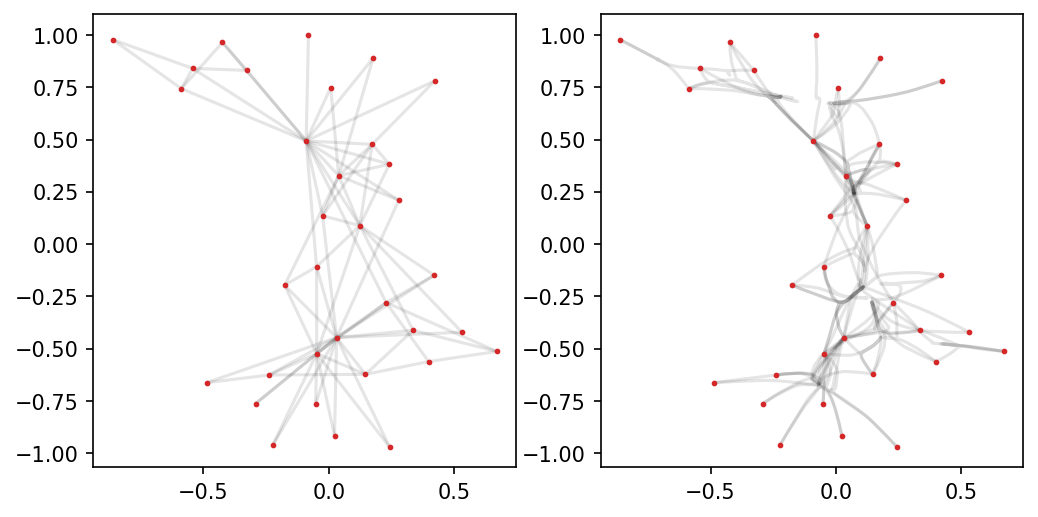

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), dpi=150)

collection = collections.LineCollection(edges, color="k", alpha=0.05)
ax[0].add_collection(collection)
ax[0].scatter(x[:, 0], x[:, 1], c="tab:red", s=3, zorder=3)

collection = collections.LineCollection(edges_fdeb, color="k", alpha=0.05)
ax[1].add_collection(collection)
ax[1].scatter(x[:, 0], x[:, 1], c="tab:red", s=3, zorder=3)